Load the data

In [21]:
import pandas as pd

def load_local_file(file_path):
    local_df = pd.read_csv(file_path)
    return local_df 
    
finance_df = load_local_file('loan_payments.csv')   
print(finance_df.head())
print(finance_df.dtypes)
print(finance_df.info())

         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1   

Transform Functions

In [199]:
from scipy import stats

class DataTransform:
    def __init__(self, dataframe) -> None:
        """
        initialises the class
        """
        self.dataframe = dataframe
        

    def remove_txt(self, column):
        """ 
        Removes superfluent text from column data
        """
        self.dataframe[column] = pd.to_numeric(self.dataframe[column].str.extract('(\d+)', expand=False))
        
        

    def correct_date_format(self):
       """
       Converts the date format of all columns that contain a date
       """
       for column_name in self.dataframe.columns:
        if 'date' in column_name.lower():
            self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
    
    def correct_single_date_column(self, column_name):
       self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
            
    
    def type_to_category(self, column_name):
       """
       converts a column to a categorical data type
       """
       self.dataframe[column_name] = self.dataframe[column_name].astype('category')
    
    def remove_outliers_z(self, columnname):
       z_scores = stats.zscore(self.dataframe[columnname])
       threshold = 2
       outlier_mask = (abs(z_scores) > threshold)
       removed_outliers_df = self.dataframe[~outlier_mask]
       return removed_outliers_df
       
       

mydata = DataTransform(finance_df)


In [123]:
mydata.remove_txt('employment_length')

In [42]:
mydata.type_to_category('home_ownership')

In [36]:
"""
re-saves the updated DF to CSV
"""
finance_df.to_csv(r'C:\Users\Tom\EDS_Project_Loan_Finance\loan_payments_transformed.csv', index=False)

In [26]:
mydata.correct_date_format()


C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
C:\Users\Tom\AppData\L

In [28]:
mydata.correct_single_date_column('earliest_credit_line')

C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])


In [31]:
mydata.remove_txt('term')

In [124]:
finance_df.dtypes

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                  float64
int_rate                              float64
instalment                            float64
grade                                  object
sub_grade                              object
employment_length                     float64
home_ownership                       category
annual_inc                            float64
verification_status                    object
issue_date                     datetime64[ns]
loan_status                            object
payment_plan                           object
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [185]:
import pandas as pd

class DataFrameInfo:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def get_summary(self):
        """
        Returns a summary of the DataFrame including basic statistics.
        """
        return self.dataframe.describe()

    def get_missing_values(self):
        """
        Returns a DataFrame showing the count of missing values in each column.
        """
        return self.dataframe.isnull().sum().to_frame(name='missing_values')

    def get_data_types(self):
        """
        Returns a Series with data types of each column.
        """
        return self.dataframe.dtypes

    def get_unique_values(self, column_name):
        """
        Returns unique values in a specific column.
        """
        return self.dataframe[column_name].unique()

    def get_value_counts(self, column_name):
        """
        Returns value counts of unique values in a specific column.
        """
        return self.dataframe[column_name].value_counts()
    
    def get_shape_of_df(self):
        return self.dataframe.shape
    
    def count_distinct_values_categorical(self):
        """
        Returns the count of distinct values in categorical columns.
        Assumes categorical columns have 'category' dtype.
        """
        categorical_columns = self.dataframe.select_dtypes(include='category').columns
        distinct_values_count = {}
        for col in categorical_columns:
            distinct_values_count[col] = len(self.dataframe[col].cat.categories)
        return distinct_values_count

    def get_null_values_stats(self):
        """
        Generates a count and percentage of NULL values in each column.
        """
        null_count = self.dataframe.isnull().sum()
        null_percentage = (null_count / len(self.dataframe)) * 100
        null_stats = pd.DataFrame({
            'null_count': null_count,
            'null_percentage': null_percentage
        })
        return null_stats

df_info = DataFrameInfo(finance_df)

summary = df_info.get_summary()
print("DataFrame Summary:")
print(summary)

missing_values = df_info.get_missing_values()
print("\nMissing Values:")
print(missing_values)

data_types = df_info.get_data_types()
print("\nData Types:")
print(data_types)

unique_values_column = df_info.get_unique_values('employment_length')
print("\nUnique Values in Column:")
print(unique_values_column)

value_counts_column = df_info.get_value_counts('int_rate')
print("\nValue Counts in Column:")
print(value_counts_column)

shape_of_df = df_info.get_shape_of_df()
print("\nShape of data is")
print(shape_of_df)

distinct_values_count = df_info.count_distinct_values_categorical()
print("\nDistinct Values Count in Categorical Columns:")
print(distinct_values_count)

# Generate count/percentage count of NULL values in each column
null_values_stats = df_info.get_null_values_stats()
print("\nNULL Values Stats:")
print(null_values_stats)


DataFrame Summary:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   

       funded_amount_inv          term      int_rate    instalment  \
count       54231.000000  49459.000000  49062.000000  54231.000000   
mean        12952.622979     42.606199     13.507328    400.013953   
min             0.000000     36.000000      5.420000     15.670000   
25%          6700.000000     36.000000     10.370000    224.205000   
50%         11300.000000     36.0000

In [54]:
columns_to_drop = ['mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_last_delinq']
dropped_finance_df = finance_df.drop(columns_to_drop, axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               51224 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        49459 non-null  float64       
 6   int_rate                    49062 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  object        
 9   sub_grade                   54231 non-null  object        
 10  employment_length           52113 non-null  category      
 11  home_ownership              54231 non-null  category  

In [95]:
print(dropped_finance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               54231 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        54231 non-null  float64       
 6   int_rate                    54231 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  object        
 9   sub_grade                   54231 non-null  object        
 10  employment_length           54231 non-null  float64       
 11  home_ownership              54231 non-null  category  

In [97]:
null_counts = finance_df.isnull().sum()

print(null_counts)

id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

In [94]:
null_counts = dropped_finance_df.isnull().sum()

print(null_counts)

id                            0
member_id                     0
loan_amount                   0
funded_amount                 0
funded_amount_inv             0
term                          0
int_rate                      0
instalment                    0
grade                         0
sub_grade                     0
employment_length             0
home_ownership                0
annual_inc                    0
verification_status           0
issue_date                    0
loan_status                   0
payment_plan                  0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_credit_line          0
inq_last_6mths                0
open_accounts                 0
total_accounts                0
out_prncp                     0
out_prncp_inv                 0
total_payment                 0
total_payment_inv             0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

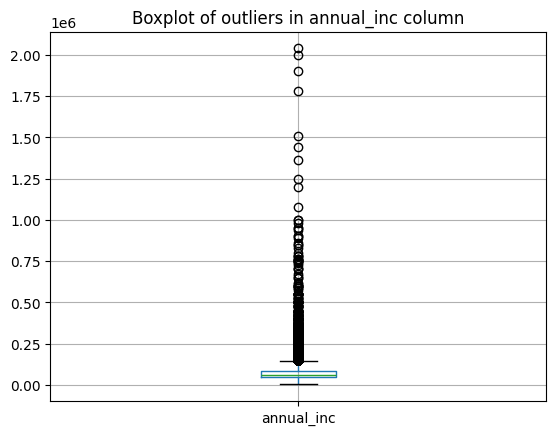

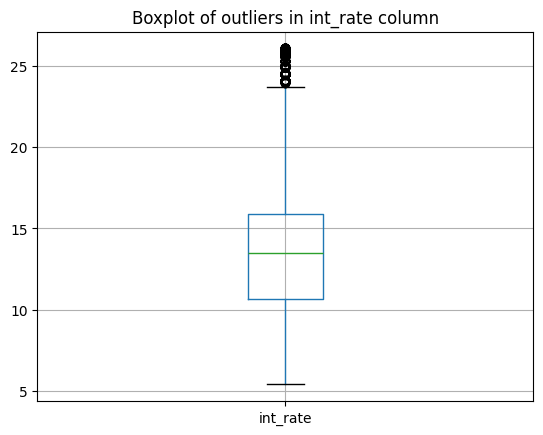

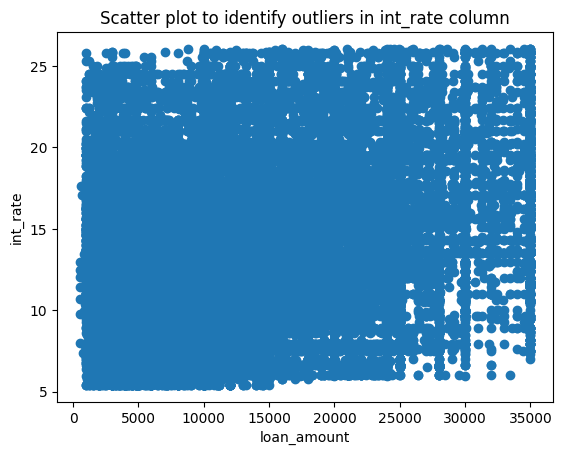

       annual_inc  Z-Scores
43       360000.0  5.578319
66       420000.0  6.741361
237      275000.0  3.930677
252      310000.0  4.609118
335      317900.0  4.762252
...           ...       ...
54107    480000.0  7.904403
54148    350000.0  5.384479
54184    500000.0  8.292083
54226    250000.0  3.446076
54228    300000.0  4.415278

[627 rows x 2 columns]


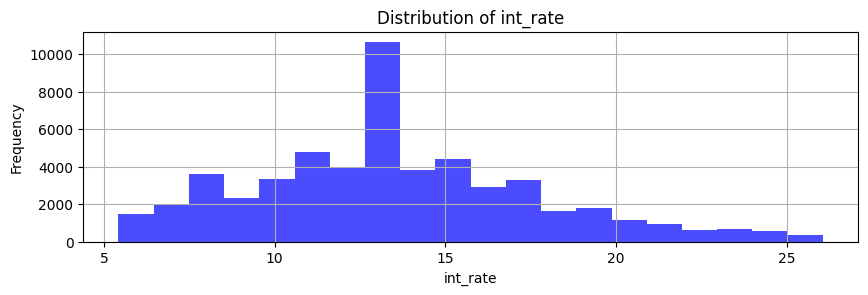

In [394]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np


class Plotter:
    def __init__(self, dataframe) -> None:
        self.dataframe = dataframe
    
    def plot_histogram_of_column(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.title(f'Distribution of {column_name}')
        self.dataframe[column_name].hist(bins=20, color='blue', alpha=0.7)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    
    def plot_histogram_of_column_after(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.title(f'Distribution of {column_name} After Null Removal')
        self.dataframe[column_name].hist(bins=20, color='blue', alpha=0.7)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    
    def q_plotter(self, column_name):
        qq_plot = qqplot(dropped_finance_df[column_name], scale=1, line='q', fit=True)
        pyplot.show()
    
    def identify_skewed_columns(self, threshold=2):
        numeric_columns = self.dataframe.select_dtypes(include=['number'])
        skewed_columns = numeric_columns.apply(lambda x: x.skew()).sort_values(ascending=False)
        skewed_columns = skewed_columns[abs(skewed_columns) > threshold]
        return skewed_columns.index.tolist()

    def see_outliers_box(self, columnname):
        self.dataframe.boxplot(column=columnname)
        plt.title(f'Boxplot of outliers in {columnname} column')
        plt.show()
        
    def see_outliers_scatter(self, columnnamex, columnnamey):  
        x_column = columnnamex 
        y_column = columnnamey

        plt.scatter(self.dataframe[x_column], self.dataframe[y_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'Scatter plot to identify outliers in {columnnamey} column')
        plt.show()
    
    def z_scores(self, columnname):
        mean_figure = np.mean(self.dataframe[columnname])
        std_dev = np.std(self.dataframe[columnname])
        z_scores = (self.dataframe[columnname] - mean_figure) / std_dev
        dropped_finance_df_z = self.dataframe
        dropped_finance_df_z['Z-Scores'] = z_scores
        filtered_z_scores_df = dropped_finance_df_z[dropped_finance_df_z['Z-Scores'] > 3]
        print(filtered_z_scores_df[[columnname,'Z-Scores']])
    
    def stacked_bar_chart_column_values(self, columnname):
        """Returns a stacked bar chart of all values in a column"""
        stacked_data = self.dataframe[columnname].value_counts().reset_index()
        stacked_data.columns = [columnname, 'count']

        #create dummy column for stacking
        stacked_data['dummy'] = 1

        stacked_data_pivot = stacked_data.pivot(index='dummy', columns=columnname, values='count').fillna(0)
        
        stacked_data_pivot.plot(kind='bar', stacked=True, colormap='viridis', legend=True)

        plt.xlabel('Dummy')
        plt.ylabel('count')
        plt.title(f'Stacked Bar chart for {columnname}')

        plt.show()
    
    def line_plot(self, x_column, y_column):
        plt.figure(figsize=(10,6))
        plt.plot(self.dataframe[x_column], self.dataframe[y_column], marker='o', linestyle='-', color='b')
        plt.title('Cumulative Lost Interest over Time')
        plt.xlabel('Last Payment Date')
        plt.ylabel('Cumulative Lost Interest')
        plt.grid(True)
        plt.show()




plot_before_df = Plotter(finance_df)
plot_after_df = Plotter(dropped_finance_df)

#plot_before_df.plot_histogram_of_column('funded_amount')
#plot_after_df.plot_histogram_of_column('funded_amount')
#plot_after_df.q_plotter('funded_amount')
#skewed_columns = plot_after_df.identify_skewed_columns()
#print("Skewed Columns:", skewed_columns)

plot_after_df.see_outliers_box('annual_inc')
plot_after_df.see_outliers_box('int_rate')
plot_after_df.see_outliers_scatter('loan_amount', 'int_rate')
plot_after_df.plot_histogram_of_column('int_rate')
plot_after_df.z_scores('annual_inc')


In [183]:
dropped_finance_df['int_rate'].describe()

count    54231.000000
mean        13.507328
std          4.178294
min          5.420000
25%         10.650000
50%         13.507328
75%         15.880000
max         26.060000
Name: int_rate, dtype: float64

In [336]:
df_outlier = DataTransform(dropped_finance_df)

new_df = df_outlier.remove_outliers_z('int_rate')

new_df['int_rate'].describe()

count    52050.000000
mean        13.077043
std          3.678151
min          5.420000
25%         10.620000
50%         13.507328
75%         15.610000
max         21.820000
Name: int_rate, dtype: float64

In [335]:
#use DataFrameInfo class on 'droppeddf
classreview = DataFrameInfo(dropped_finance_df)

value_counts_column = classreview.get_value_counts('int_rate')
print("\nValue Counts in Column:")
print(value_counts_column)

classreview2 = DataFrameInfo(new_df)

value_counts_column2 = classreview2.get_value_counts('loan_status')
print("\nValue Counts in Column:")
print(value_counts_column2)



Value Counts in Column:
int_rate
13.507328    5169
11.990000    1848
10.990000    1842
12.990000    1609
15.610000    1158
             ... 
24.590000       1
18.490000       1
12.620000       1
17.410000       1
15.380000       1
Name: count, Length: 458, dtype: int64

Value Counts in Column:
loan_status
Charged Off    43611
Name: count, dtype: int64


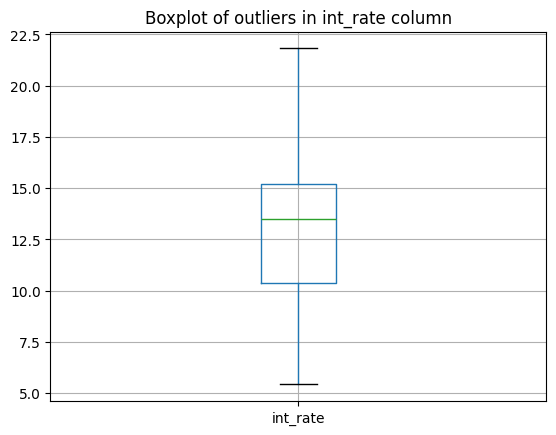

In [334]:
after_outliers_removed = Plotter(new_df)
after_outliers_removed.see_outliers_box('int_rate')


In [374]:
from scipy import stats
import numpy as np

class DataFrameTransform:
    def __init__(self, dataframe) -> None:
        self.dataframe = dataframe
        

    def impute_null_next_payment_date_inplace(self):
        column1 = 'last_payment_date'
        column2 = 'next_payment_date'
        self.dataframe[column2] = self.dataframe.apply(lambda row: row[column1] + pd.offsets.MonthBegin(1) if pd.isnull(row[column2]) else row[column2], axis=1)

    def remove_txt(self, column):
        """ 
        Removes superfluent text from column data
        """
        self.dataframe[column] = pd.to_numeric(self.dataframe[column].str.extract('(\d+)', expand=False))
    
    def impute_null_values_mean(self, columnname):
        mean_employment_length = self.dataframe[columnname].mean()
        self.dataframe[columnname].fillna(mean_employment_length, inplace=True)
    
    def impute_null_values_median(self, columnname):
        median_value = self.dataframe[columnname].median()
        self.dataframe[columnname].fillna(median_value, inplace=True)
    
    def impute_last_credit_pull_date(self):
        column1 = 'last_payment_date'
        column2 = 'last_credit_pull_date'
        self.dataframe[column2] = self.dataframe.apply(lambda row: row[column1] if pd.isnull(row[column2]) else row[column2], axis=1)
    
    def impute_last_payment_date(self):
       self.dataframe['last_payment_date'] = np.where((self.dataframe['last_payment_date'] == '1970-01-01') | (self.dataframe['last_payment_date'].isnull()), self.dataframe['last_credit_pull_date'], self.dataframe['last_payment_date'])
    
    def correct_date_format(self):
       """
       Converts the date format of all coumns that contain a date
       """
       for column_name in self.dataframe.columns:
        if 'date' in column_name.lower():
            self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
    
    def correct_single_date_column(self, column_name):
       self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
    
    def set_data_type(self, column_name):
       """
       converts a column to a specified data type
       """
       self.dataframe[column_name] = self.dataframe[column_name].astype('object')
    
    def remove_outliers_z(self, columnname):
       z_scores = stats.zscore(self.dataframe[columnname])
       threshold = 2
       outlier_mask = (abs(z_scores) > threshold)
       removed_outliers_df = self.dataframe[~outlier_mask]
       return removed_outliers_df
    
    


imputed_df = DataFrameTransform(dropped_finance_df)
imputed_df.set_data_type('id')


In [326]:
print(dropped_finance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  object        
 1   member_id                   54231 non-null  object        
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               54231 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        54231 non-null  float64       
 6   int_rate                    54231 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  object        
 9   sub_grade                   54231 non-null  object        
 10  employment_length           54231 non-null  float64       
 11  home_ownership              54231 non-null  category  

In [327]:
skew_value = dropped_finance_df['annual_inc'].skew()
print(skew_value)

dropped_finance_df['annual_inc'].describe()




8.711831033809583


count    5.423100e+04
mean     7.222085e+04
std      5.158934e+04
min      3.300000e+03
25%      4.500000e+04
50%      6.100000e+04
75%      8.600000e+04
max      2.039784e+06
Name: annual_inc, dtype: float64

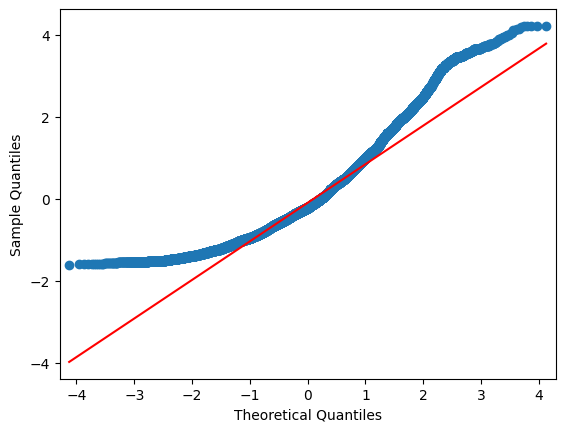

In [164]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qq_plot = qqplot(dropped_finance_df['instalment'], scale=1, line='q', fit=True)
pyplot.show()

count    54231.000000
mean       400.013953
std        238.920012
min         15.670000
25%        224.205000
50%        347.150000
75%        527.550000
max       1407.010000
Name: instalment, dtype: float64

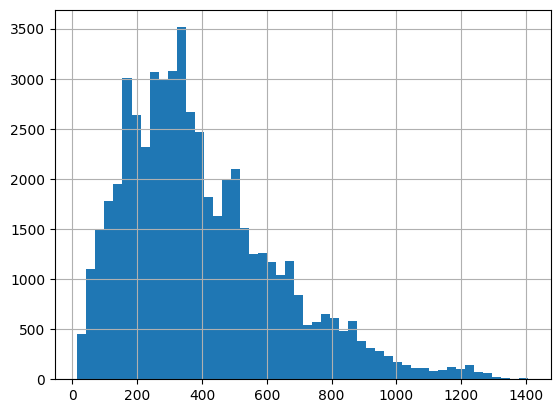

In [165]:
dropped_finance_df['instalment'].hist(bins=50)
dropped_finance_df['instalment'].describe()

In [328]:
def identify_skewed_columns(dataframe, threshold=0.5):
    numeric_columns = dataframe.select_dtypes(include=['number'])
    skewed_columns = numeric_columns.apply(lambda x: x.skew()).sort_values(ascending=False)
    skewed_columns = skewed_columns[abs(skewed_columns) > threshold]
    return skewed_columns.index.tolist()

skewed_list = identify_skewed_columns(dropped_finance_df, threshold=5)
print("Skewed Columns", skewed_list)

Skewed Columns ['collection_recovery_fee', 'collections_12_mths_ex_med', 'recoveries', 'total_rec_late_fee', 'Z-Scores', 'annual_inc', 'delinq_2yrs']


<Axes: >

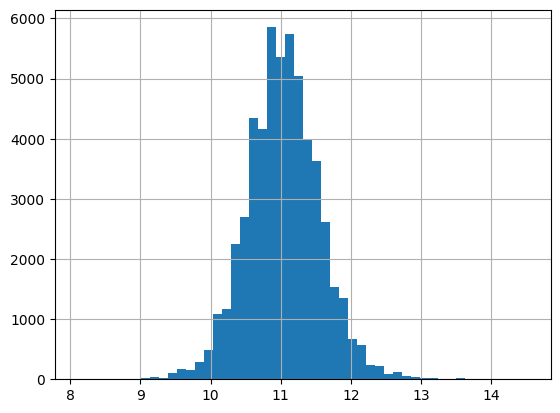

In [329]:
import numpy as np
log_annual_inc = dropped_finance_df['annual_inc']. map(lambda i: np.log(i) if i > 0 else 0)
log_annual_inc.hist(bins=50)


<Axes: >

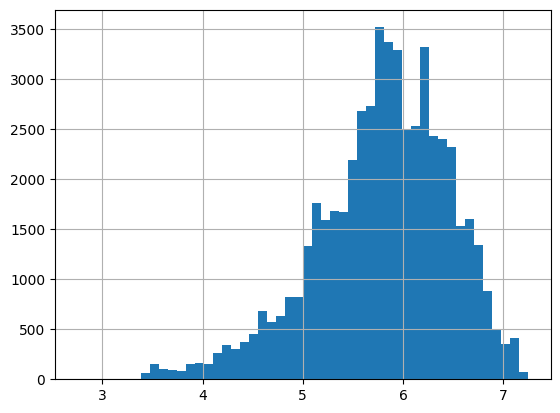

In [330]:
import numpy as np
log_instalment = dropped_finance_df['instalment']. map(lambda i: np.log(i) if i > 0 else 0)
log_instalment.hist(bins=50)


In [331]:
remove_outliers = DataFrameTransform(new_df)
new_df = remove_outliers.remove_outliers_z('instalment')



In [332]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43611 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          43611 non-null  object        
 1   member_id                   43611 non-null  object        
 2   loan_amount                 43611 non-null  int64         
 3   funded_amount               43611 non-null  float64       
 4   funded_amount_inv           43611 non-null  float64       
 5   term                        43611 non-null  float64       
 6   int_rate                    43611 non-null  float64       
 7   instalment                  43611 non-null  float64       
 8   grade                       43611 non-null  object        
 9   sub_grade                   43611 non-null  object        
 10  employment_length           43611 non-null  float64       
 11  home_ownership              43611 non-null  category      


The following code attempts to save the latest dataframe as a .h5 file, so that it maintains the applied datatypes

In [219]:
#object_columns = new_df.select_dtypes(include=['object']).columns
#new_df[object_columns] = new_df[object_columns].astype(str)

#new_df.to_hdf('latest_df_with_dtypes.h5', key='data', mode='w', format='table')

C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\1918953095.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MILESTONE 4 is captured below this Markdown:

In [224]:
""" Opens up the dataframe that was saved after deleting columns with high correlation"""

m4_df = pd.read_hdf('colinea_dropped_df.h5', key='data')

In [325]:
new_df[['instalment', 'loan_amount', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_rec_int', 'loan_status']].head()


,instalment,loan_amount,out_prncp,out_prncp_inv,total_payment,total_rec_int,loan_status
0,248.82,8000,5529.70,5529.70,2982.51,512.21,Charged Off
1,407.52,13200,9102.83,9102.83,4885.11,787.94,Charged Off
2,497.63,16000,0.00,0.00,16824.54,824.54,Charged Off
3,514.93,15000,0.00,0.00,15947.47,947.47,Charged Off
4,456.54,15000,10297.47,10297.47,5473.46,770.93,Charged Off


In [274]:
m4_df[['loan_amount', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_rec_int', 'loan_status']].head()

,loan_amount,out_prncp,out_prncp_inv,total_payment,total_rec_int,loan_status
0,8000,5529.70,5529.70,2982.51,512.21,Current
1,13200,9102.83,9102.83,4885.11,787.94,Current
2,16000,0.00,0.00,16824.54,824.54,Fully Paid
3,15000,0.00,0.00,15947.47,947.47,Fully Paid
4,15000,10297.47,10297.47,5473.46,770.93,Current


The percentage of loans fully repaid is  51.58%


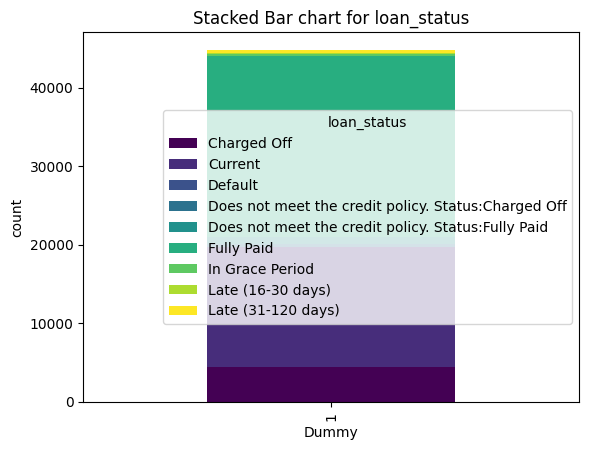

In [260]:
"""Task One, part one - Current State of Loans"""
#Calculate the percentage of loans that are fully paid

m4info = DataFrameInfo(m4_df)
recovered_loans = m4info.get_value_counts('loan_status')['Fully Paid']
recovered_loans
percentage_fully_recovered = (recovered_loans / len(m4_df)) * 100
print(f"The percentage of loans fully repaid is {percentage_fully_recovered: .2f}%")

m4plots = Plotter(m4_df)
m4plots.stacked_bar_chart_column_values('loan_status')




In [342]:
"""Task One, part 2 - 6 months later"""
#Need to revert to 'new_df' as colinearity task removed key columns needed to calc position in 6 months

new_df['total_received_6months'] = new_df['total_payment'] + (new_df['instalment'] * 6)

new_df[['instalment', 'loan_amount', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_rec_int', 'loan_status', 'total_received_6months']].head()





C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\3577426161.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,instalment,loan_amount,out_prncp,out_prncp_inv,total_payment,total_rec_int,loan_status,total_received_6months
0,248.82,8000,5529.70,5529.70,2982.51,512.21,Current,4475.43
1,407.52,13200,9102.83,9102.83,4885.11,787.94,Current,7330.23
2,497.63,16000,0.00,0.00,16824.54,824.54,Fully Paid,19810.32
3,514.93,15000,0.00,0.00,15947.47,947.47,Fully Paid,19037.05
4,456.54,15000,10297.47,10297.47,5473.46,770.93,Current,8212.70


In [343]:
#apply a new status for loans fully recovered in 6 months
def determine_status(row):
    if row['total_received_6months'] >= row['loan_amount']:
        return 'Fully Paid'
    else:
        return row['loan_status']

new_df['status_in_6months'] = new_df.apply(determine_status, axis=1)

C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\42135265.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In 6 months the percentage of loans fully repaid is  85.00%


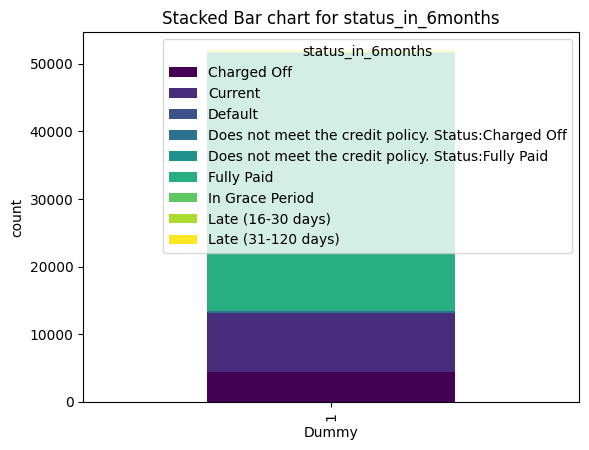

In [344]:
new_df_6months = new_df

m4info_6months = DataFrameInfo(new_df_6months)
recovered_loans_6months = m4info_6months.get_value_counts('status_in_6months')['Fully Paid']
recovered_loans_6months
percentage_fully_recovered_6months = (recovered_loans_6months / len(m4_df)) * 100
print(f"In 6 months the percentage of loans fully repaid is {percentage_fully_recovered_6months: .2f}%")

m4plots_6months = Plotter(new_df_6months)
m4plots_6months.stacked_bar_chart_column_values('status_in_6months')

In [345]:
"""Task Two, part one - Charged off Loans"""
#Calculate the percentage of loans that are cgarged off

m4info = DataFrameInfo(m4_df)
co_loans = m4info.get_value_counts('loan_status')['Charged Off']
co_loans
percentage_chargedoff = (co_loans / len(m4_df)) * 100
print(f"The percentage of loans charged off is {percentage_chargedoff: .2f}%")

The percentage of loans charged off is  10.03%


In [349]:
"""Task Two part two, payments received against charged off loans"""

#First filter the loans to only charged off loans
co_df = dropped_finance_df
co_df_filtered = co_df[co_df['loan_status'] == 'Charged Off']

#Next, return the total payments received in this filtered df

co_payments_received = co_df_filtered['total_payment'].sum()
print(f"The total value of payments received against charged off loans is £{co_payments_received: .0f}")
co_loans_written = co_df_filtered['loan_amount'].sum()
print(f"The total value of charged off loans is £{co_loans_written: .0f}")
print(f"Therefore the loss on these loans is £{co_loans_written - co_payments_received: .0f}")





The total value of payments received against charged off loans is £ 37400589
The total value of charged off loans is £ 76359400
Therefore the loss on these loans is £ 38958811


In [370]:
"""Task 3, projected loss"""

#Revenue = interest charged, total interest = instalments * term, less loan amount. Lost revenue = total interest - total received interest

co_df_filtered['lost_interest'] = ((co_df_filtered['instalment'] * co_df_filtered['term']) - co_df_filtered['loan_amount']) - co_df_filtered['total_rec_int']
Lost_Interest_revenue = co_df_filtered['lost_interest'].sum()
print(f"The total value of lost revenue on charged off loans is projected to be £{Lost_Interest_revenue: .0f}")

#Get remaining term
co_df_filtered['spent_term'] = co_df_filtered['last_payment_date'] - co_df_filtered['issue_date']





The total value of lost revenue on charged off loans is projected to be £ 13152874


In [380]:
#impute blank /0 last payment dates

charge_off_df = DataFrameTransform(co_df_filtered)
charge_off_df.impute_last_payment_date()

#sort by last payment date == date loss is realised
co_df_filtered = co_df_filtered.sort_values(by= 'last_payment_date')

In [388]:

#include cumulative lost interest:

co_df_filtered['cumulative_lost_interest'] = co_df_filtered['lost_interest'].cumsum()





In [389]:
co_df_filtered[['lost_interest', 'cumulative_lost_interest']]

,lost_interest,cumulative_lost_interest
53686,1914.70,1914.70
54124,1228.18,3142.88
54086,271.44,3414.32
54110,268.97,3683.29
53864,3209.42,6892.71
...,...,...
50188,1062.68,13147540.28
13807,554.16,13148094.44
40557,1372.00,13149466.44
27503,2456.32,13151922.76


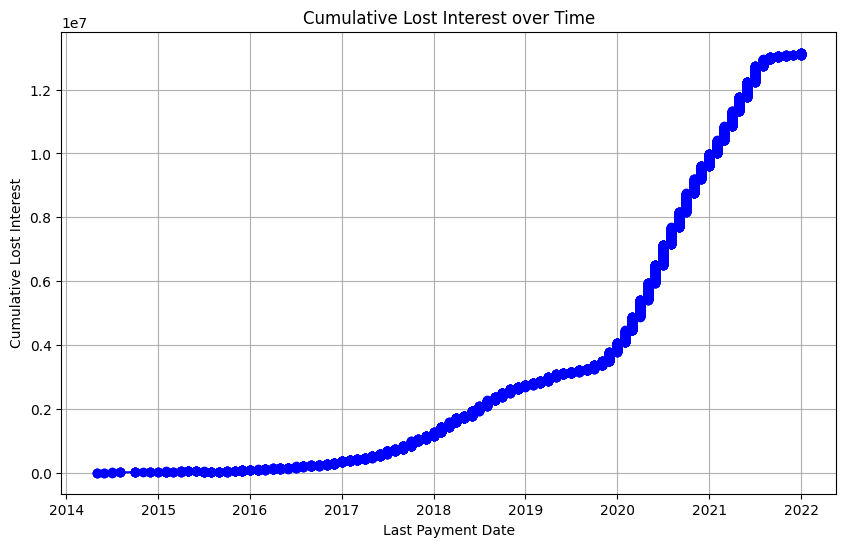

In [396]:
co_plot = Plotter(co_df_filtered)
co_plot.line_plot('last_payment_date', 'cumulative_lost_interest')

Task 4 - Possible Loss

In [404]:
m4_df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [417]:
late_customers = (m4_df[m4_df['loan_status'] == 'Late (31-120 days)'].shape[0]) + (m4_df[m4_df['loan_status'] == 'Late (16-30 days)'].shape[0])
late_percentage = ((late_customers) / (len(m4_df))) * 100
print(f"Late cusotmers account for {late_percentage: .0f}% of all loans")

m4_df['loan_status'].value_counts()




Late cusotmers account for  1% of all loans


loan_status
Fully Paid                                             23107
Current                                                15233
Charged Off                                             4494
Does not meet the credit policy. Status:Fully Paid       870
Late (31-120 days)                                       441
Does not meet the credit policy. Status:Charged Off      326
In Grace Period                                          203
Late (16-30 days)                                         83
Default                                                   41
Name: count, dtype: int64